In [1]:
# Import MNIST fashion dataset

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load data

(X_train, y_train), (X_test, y_test) = mnist.load_data()

The image is number:  [6]


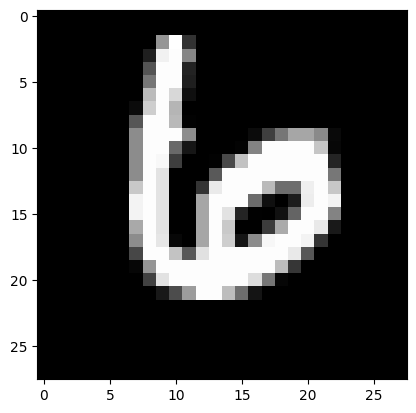

In [3]:
# Plot a random image

rand_idx = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[rand_idx], cmap='gray')
print("The image is number: ", [y_train[rand_idx]])

In [4]:
# Scale values between -1 an 1

X_train = X_train.astype('float32') / 127.5 - 1
X_test = X_test.astype('float32') / 127.5 - 1

The image is number:  [6]


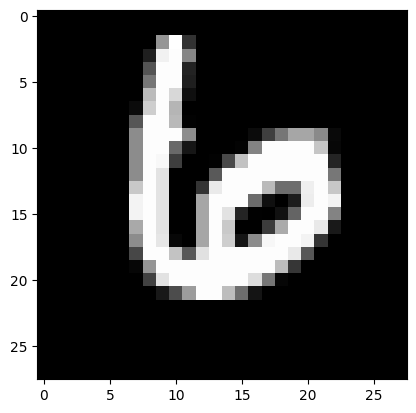

In [5]:
plt.imshow(X_train[rand_idx], cmap='gray')
print("The image is number: ", [y_train[rand_idx]])

## Build a Neural Network using Sequential

In [6]:
# Build the model

model_sequential = keras.Sequential([
    keras.Input(shape=(28, 28)),                    # Input layer with shape of 28x28 (image size in pixels)
    layers.Flatten(),                               # Flatten the image into a 1D array of 28*28=784 pixels
    layers.Dense(128, activation='relu'),           # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')          # Output layer with 10 neurons (number of classes) and softmax activation (probabilities of each class)
])

In [7]:
# Compile the model

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model_sequential.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
# Train the model

model_sequential.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=15, verbose=2)

Epoch 1/15


1500/1500 - 3s - loss: 0.3559 - accuracy: 0.8932 - val_loss: 0.2771 - val_accuracy: 0.9113 - 3s/epoch - 2ms/step
Epoch 2/15
1500/1500 - 2s - loss: 0.1862 - accuracy: 0.9445 - val_loss: 0.1672 - val_accuracy: 0.9498 - 2s/epoch - 1ms/step
Epoch 3/15
1500/1500 - 2s - loss: 0.1435 - accuracy: 0.9570 - val_loss: 0.1549 - val_accuracy: 0.9557 - 2s/epoch - 1ms/step
Epoch 4/15
1500/1500 - 2s - loss: 0.1180 - accuracy: 0.9641 - val_loss: 0.1384 - val_accuracy: 0.9600 - 2s/epoch - 2ms/step
Epoch 5/15
1500/1500 - 2s - loss: 0.1001 - accuracy: 0.9686 - val_loss: 0.1302 - val_accuracy: 0.9603 - 2s/epoch - 1ms/step
Epoch 6/15
1500/1500 - 2s - loss: 0.0915 - accuracy: 0.9712 - val_loss: 0.1471 - val_accuracy: 0.9556 - 2s/epoch - 1ms/step
Epoch 7/15
1500/1500 - 2s - loss: 0.0819 - accuracy: 0.9734 - val_loss: 0.1178 - val_accuracy: 0.9673 - 2s/epoch - 1ms/step
Epoch 8/15
1500/1500 - 2s - loss: 0.0728 - accuracy: 0.9765 - val_loss: 0.1130 - val_accuracy: 0.9680 - 2s/epoch - 1ms/step
Epoch 

In [9]:
# Evaluate the model

_, model_sequential_accuracy = model_sequential.evaluate(X_test, y_test, batch_size=32, verbose=0)
print(f"Sequential model accuracy: {round(model_sequential_accuracy * 100, 2)}%")

Sequential model accuracy: 96.43%


1/1 [==============================] - 0s 68ms/step
Model prediction:  8
The number is:  8


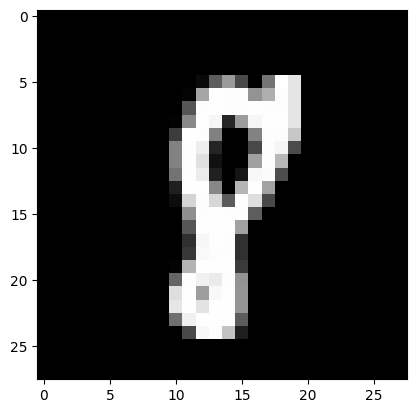

In [10]:
# Make random predictions

rand_idx = np.random.randint(0, X_test.shape[0])
test_instance = X_test[rand_idx].reshape(1, 28, 28)
predictions = model_sequential.predict(test_instance)

print("Model prediction: ", np.argmax(predictions))
print("The number is: ", y_test[rand_idx])

plt.imshow(test_instance.reshape(28, 28), cmap='gray')

## Build a Neural Network using Functional API

In [11]:
# Build the model

inputs = keras.Input(shape=(28, 28))                    # Input layer with shape of 28x28 (image size in pixels)
x = layers.Flatten()(inputs)                            # Flatten the image into a 1D array of shape 784 (28*28)
x = layers.Dense(128, activation='relu')(x)             # Hidden layer with 128 neurons and ReLU activation
outputs = layers.Dense(10, activation='softmax')(x)     # Output layer with 10 neurons (number of classes) and softmax activation (probabilities of each class)

model_functional = keras.Model(inputs=inputs, outputs=outputs)

In [12]:
# Compile the model

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model_functional.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
# Train the model

model_functional.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=15, verbose=2)

Epoch 1/15
1500/1500 - 2s - loss: 0.3531 - accuracy: 0.8939 - val_loss: 0.2349 - val_accuracy: 0.9293 - 2s/epoch - 2ms/step
Epoch 2/15
1500/1500 - 2s - loss: 0.1852 - accuracy: 0.9444 - val_loss: 0.1658 - val_accuracy: 0.9507 - 2s/epoch - 1ms/step
Epoch 3/15
1500/1500 - 2s - loss: 0.1407 - accuracy: 0.9575 - val_loss: 0.1346 - val_accuracy: 0.9600 - 2s/epoch - 1ms/step
Epoch 4/15
1500/1500 - 2s - loss: 0.1186 - accuracy: 0.9629 - val_loss: 0.1315 - val_accuracy: 0.9602 - 2s/epoch - 1ms/step
Epoch 5/15
1500/1500 - 2s - loss: 0.1054 - accuracy: 0.9662 - val_loss: 0.1167 - val_accuracy: 0.9654 - 2s/epoch - 1ms/step
Epoch 6/15
1500/1500 - 2s - loss: 0.0901 - accuracy: 0.9714 - val_loss: 0.1413 - val_accuracy: 0.9600 - 2s/epoch - 1ms/step
Epoch 7/15
1500/1500 - 2s - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.1322 - val_accuracy: 0.9637 - 2s/epoch - 1ms/step
Epoch 8/15
1500/1500 - 2s - loss: 0.0784 - accuracy: 0.9747 - val_loss: 0.1171 - val_accuracy: 0.9682 - 2s/epoch - 1ms/step
Epoch 9/

In [14]:
# Evaluate the model

_, model_functional_accuracy = model_functional.evaluate(X_test, y_test, batch_size=32, verbose=0)
print(f"Functional model accuracy: {round(model_functional_accuracy * 100, 2)}%")

Functional model accuracy: 97.41%


1/1 [==============================] - 0s 38ms/step
Model prediction:  6
The number is:  6


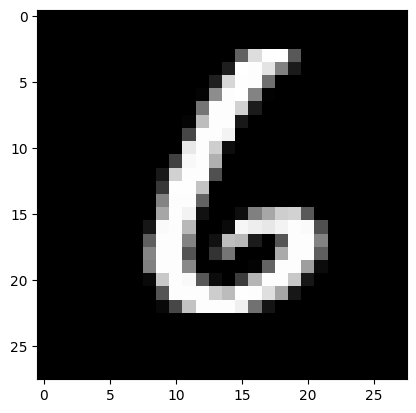

In [15]:
# Make random predictions

rand_idx = np.random.randint(0, X_test.shape[0])
test_instance = X_test[rand_idx].reshape(1, 28, 28)
predictions = model_functional.predict(test_instance)

print("Model prediction: ", np.argmax(predictions))
print("The number is: ", y_test[rand_idx])

plt.imshow(test_instance.reshape(28, 28), cmap='gray')

## Build a Neural Network using PyTorch

In [16]:
# import necessary libraries

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import tqdm

In [17]:
# Convert numpy arrays to PyTorch tensors

X_train = torch.from_numpy(X_train)
y_train = torch.from_numpy(y_train)

X_test = torch.from_numpy(X_test)
y_test = torch.from_numpy(y_test)

In [18]:
# Create a DataLoader

train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [19]:
# Build the Neural Network

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()           # Call the parent class constructor
        self.flatten = nn.Flatten()                     # Flatten the input tensor from shape (batch_size, 28, 28) to (batch_size, 28*28)
        self.hidden = nn.Linear(28*28, 128)             # Hidden layer with 128 neurons
        self.output = nn.Linear(128, 10)                # Output layer with 10 neurons (number of classes)

    def forward(self, x):
        x = self.flatten(x)                             # Flatten the input tensor
        x = nn.functional.relu(self.hidden(x))          # Execute the hidden layer with ReLU activation
        x = self.output(x)                              # Execute the output layer
        return x

model_pyTorch = NeuralNetwork()

In [20]:
# Define the loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_pyTorch.parameters(), lr=0.001)

In [21]:
# Train the model

for epoch in range(15):                                     # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in tqdm.tqdm(enumerate(train_loader, 0), total=len(train_loader)):
        inputs, labels = data                               # get the inputs; data is a list of [inputs, labels]
        optimizer.zero_grad()                               # zero the parameter gradients; which means that the optimizer will zero all the gradients in the model before the next batch is passed through; necessary to avoid accumulation of gradients
        outputs = model_pyTorch(inputs)                     # forward pass; calculate the output of the model for the given input
        loss = criterion(outputs, labels)                   # calculate the loss
        loss.backward()                                     # backward pass; calculate the gradients of the loss with respect to the model parameters to update the model
        optimizer.step()                                    # optimize the model parameters based on the gradients
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, loss: {running_loss/len(train_loader)}")

100%|██████████| 1875/1875 [00:02<00:00, 814.20it/s]


Epoch 1, loss: 0.3466315827290217


100%|██████████| 1875/1875 [00:02<00:00, 766.75it/s]


Epoch 2, loss: 0.1712473076251646


100%|██████████| 1875/1875 [00:02<00:00, 756.92it/s]


Epoch 3, loss: 0.12917970973948636


100%|██████████| 1875/1875 [00:02<00:00, 777.86it/s]


Epoch 4, loss: 0.10745131133832038


100%|██████████| 1875/1875 [00:02<00:00, 770.50it/s]


Epoch 5, loss: 0.09181136831076195


100%|██████████| 1875/1875 [00:02<00:00, 716.83it/s]


Epoch 6, loss: 0.08204440211349477


100%|██████████| 1875/1875 [00:02<00:00, 739.02it/s]


Epoch 7, loss: 0.07295646565446319


100%|██████████| 1875/1875 [00:02<00:00, 771.17it/s]


Epoch 8, loss: 0.06836971134655953


100%|██████████| 1875/1875 [00:02<00:00, 684.09it/s]


Epoch 9, loss: 0.06198213235788668


100%|██████████| 1875/1875 [00:02<00:00, 766.23it/s]


Epoch 10, loss: 0.05900165988478499


100%|██████████| 1875/1875 [00:02<00:00, 725.67it/s]


Epoch 11, loss: 0.05287305401530272


100%|██████████| 1875/1875 [00:02<00:00, 772.05it/s]


Epoch 12, loss: 0.050001979286766925


100%|██████████| 1875/1875 [00:02<00:00, 659.08it/s]


Epoch 13, loss: 0.04923087822323044


100%|██████████| 1875/1875 [00:02<00:00, 676.85it/s]


Epoch 14, loss: 0.044218755800509824


100%|██████████| 1875/1875 [00:02<00:00, 678.34it/s]

Epoch 15, loss: 0.04348490875000716


In [22]:
# Evaluate the model

outputs = model_pyTorch(X_test)
_, predictions = torch.max(outputs, 1)
accuracy = (predictions == y_test).sum().item() / y_test.size(0)
print(f'Accuracy: {round(accuracy*100, 2)}%')

Accuracy: 97.46%


Model prediction:  0
The number is:  0


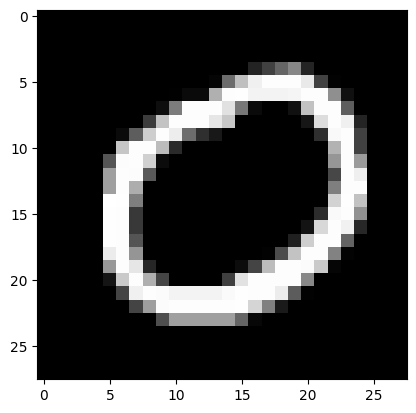

In [23]:
# Make random predictions

rand_idx = np.random.randint(0, X_test.size(0))
test_instance = X_test[rand_idx].reshape(1, 28, 28)
predictions = model_pyTorch(test_instance)
_, prediction = torch.max(predictions, 1)

plt.imshow(test_instance.reshape(28, 28), cmap='gray')

print("Model prediction: ", prediction.item())
print("The number is: ", y_test[rand_idx].item())
